<a href="https://colab.research.google.com/github/rakeshindukuri/projects/blob/main/Cancer_pred_rf/Cancercancer_pred_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# IMPORTING
#handling
import pandas as pd
import numpy as np
#vis
import matplotlib.pyplot as plt
import seaborn as sns
#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize
#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [6]:
# Read data

data=pd.read_csv('cancer_gene_expression.csv')
data.shape

(503, 8001)

In [19]:
data.isnull().sum()
data=data.dropna()

<Axes: >

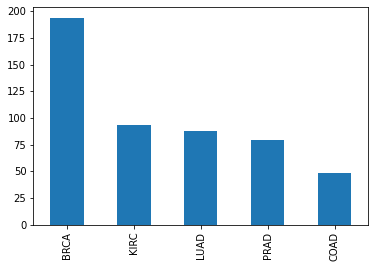

In [20]:
# plotting distribution:

data['Cancer_Type'].value_counts().plot.bar()

<Axes: ylabel='Cancer_Type'>

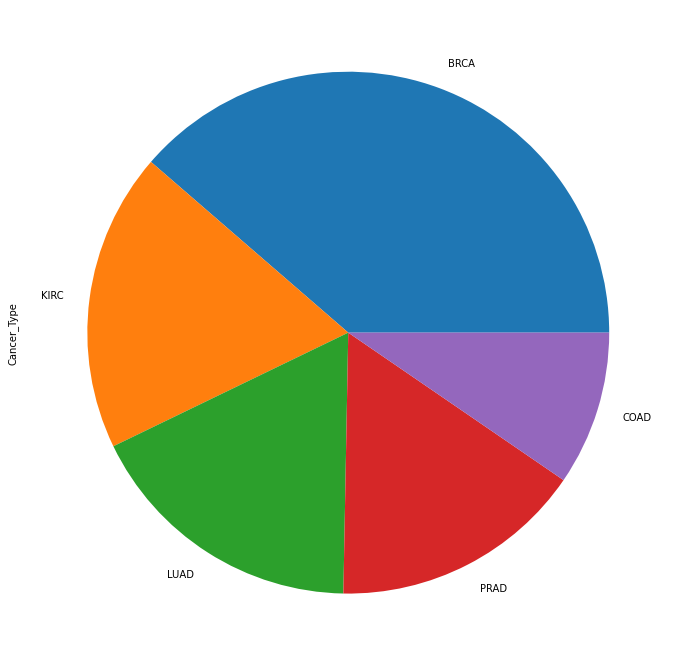

In [21]:
data['Cancer_Type'].value_counts().plot(kind='pie', figsize=(12,12))

In [22]:
# DATA PREPROCESSING

X=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [23]:
# Encoding labels

le=LabelEncoder()
le.fit(y)
y_encoded=le.transform(y)
labels=le.classes_
classes=np.unique(y_encoded)

In [58]:
# Data splitting
# Train and test
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.34, random_state=42)
X_train

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7991,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000
157,0.000000,0.000000,0.0,2.559125,0.0,0.000000,0.0,0.0,0.918157,4.088735,...,5.990978,11.817671,9.680247,6.547377,6.410729,11.383440,7.483372,10.638083,5.493177,1.875466
468,0.000000,0.000000,0.0,1.668936,0.0,0.000000,0.0,0.0,0.000000,1.668936,...,5.645947,11.804809,8.220765,6.763996,6.617955,11.809547,7.013172,9.945862,5.903414,1.668936
118,0.000000,0.000000,0.0,2.847656,0.0,0.000000,0.0,0.0,1.023681,1.023681,...,7.125589,11.433846,8.528591,3.687083,5.853452,11.769288,7.627884,10.480992,5.814258,0.000000
114,0.000000,0.000000,0.0,2.666575,0.0,0.375401,0.0,0.0,1.623024,1.130074,...,6.078070,11.486810,8.405937,5.661878,6.664568,11.044900,8.400871,11.008940,6.359825,1.313768
175,0.000000,0.000000,0.0,3.304978,0.0,0.000000,0.0,0.0,0.397584,1.537843,...,7.137340,12.402836,7.629488,6.257531,7.214562,12.366462,7.226836,10.143485,6.601836,3.933252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.000000,0.338681,0.0,2.458828,0.0,0.000000,0.0,0.0,0.612683,1.215865,...,7.075436,11.184466,9.983250,5.555657,7.149900,11.429438,7.295493,10.468319,6.926509,4.076739
270,0.000000,0.323774,0.0,3.256180,0.0,0.000000,0.0,0.0,0.000000,1.591105,...,6.523327,11.213487,4.468238,4.593808,6.536605,11.697802,7.373309,11.750900,6.422746,1.706818
348,0.873341,0.000000,0.0,3.085340,0.0,0.000000,0.0,0.0,0.501821,1.805623,...,7.044372,12.216540,7.504080,2.679807,6.253445,11.432923,7.562395,9.897838,4.418372,2.246043
435,0.000000,0.000000,0.0,2.396269,0.0,0.000000,0.0,0.0,1.046910,1.473423,...,6.698996,12.184857,7.501208,1.802235,6.294066,11.378479,6.881603,10.065712,4.693520,1.942195


In [59]:
# Scaling b/w 0 and 1

mms=MinMaxScaler()
X_train_nor = mms.fit_transform(X_train)
X_test_nor = mms.fit_transform(X_test)

In [60]:
# Feature Selection: Using Mutual Information

mi = mutual_info_classif(X_train_nor, y_train)

n_features = 444
selected_scores=np.argsort(mi)[::-1][0:n_features]


In [61]:
X_train_selected = X_train_nor[:,selected_scores]
X_test_selected = X_test_nor[:,selected_scores]

In [62]:
# CLASSIFICATION: RF with one versus rest strategy

rf = OneVsRestClassifier(RandomForestClassifier(max_features=0.25))
rf.fit(X_train_selected, y_train)
y_pred = rf.predict(X_test_selected)
pred_prob = rf.predict(X_test_selected)

In [63]:
# Model Evaluation

accuracy = np.round(balanced_accuracy_score(y_test, y_pred), 4)
print(f'accuracy: {accuracy}')

precision = np.round(precision_score(y_test, y_pred, average='weighted'),4)
print(f"precision: {precision}")

recall = np.round(recall_score(y_test, y_pred, average='weighted'), 4)
print(f"recall: {recall}")

f1s = np.round(f1_score(y_test, y_pred, average='weighted'), 4)
print(f"f1 score: {f1s}")

report = classification_report(y_test, y_pred, target_names=labels)
print(report)

accuracy: 0.8982
precision: 0.9401
recall: 0.9298
f1 score: 0.9294
              precision    recall  f1-score   support

        BRCA       0.85      1.00      0.92        70
        COAD       1.00      0.81      0.90        16
        KIRC       1.00      1.00      1.00        29
        LUAD       1.00      0.84      0.91        31
        PRAD       1.00      0.84      0.91        25

    accuracy                           0.93       171
   macro avg       0.97      0.90      0.93       171
weighted avg       0.94      0.93      0.93       171



In [64]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

In [65]:
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,70,0,0,0,0
COAD,3,13,0,0,0
KIRC,0,0,29,0,0
LUAD,5,0,0,26,0
PRAD,4,0,0,0,21


Text(33.0, 0.5, 'true Labels')

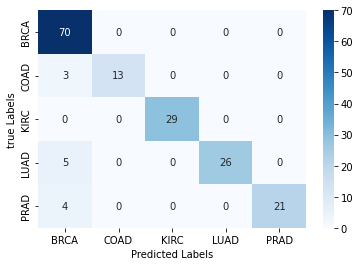

In [66]:
# Visualize confusion matrix with sns

sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('true Labels')

# Final: Model is little biased w/ BRCA. 